#  `region_volumes`

Calculates the volume of each region in a labeled image. This method works by applying `mesh_volume` on each region to calculate the volume based on meshing the regions (marching cube) or by applying a summation on the number of voxels within each region.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import inspect
inspect.signature(ps.metrics.region_volumes)

<Signature (regions, mode='marching_cubes')>

## `regions`
The input image of the pore space partitioned into individual pore regions. Note that zeros in the image (solid phase) will not be considered for volume calculation.

0it [00:00, ?it/s]

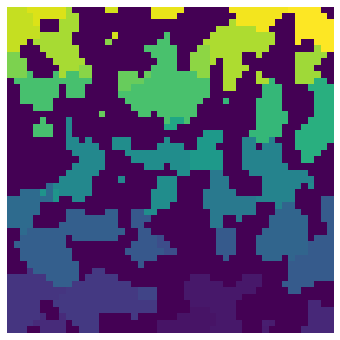

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[50,50,50])
snow = ps.filters.snow_partitioning(im)
regions = snow.regions
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(regions[:,:,20], origin='lower', interpolation='none')
ax.axis(False);

The `region_volumes` returns an array containing the volume of each region, offset by 1, such that the volume of region 1 is stored in element 0 of the array. We can visualize each region's volume by assigning the returned values to each region:

Computing region volumes                                    :   0%|          | 0/210 [00:00<?, ?it/s]

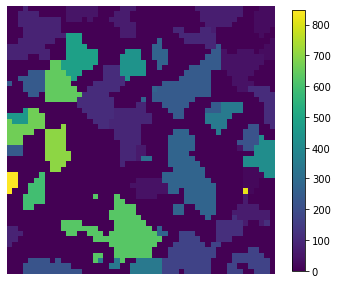

In [3]:
vols = ps.metrics.region_volumes(regions=regions)
regions_vol = np.copy(regions)
for i in range(0, len(vols)):
    mask = np.array(np.where(regions_vol == i, regions_vol, 0), dtype=bool)
    regions_vol[mask] = vols[i]
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
plt.imshow(regions_vol[:,:,10], origin='lower', interpolation='none')
cbar = plt.colorbar(ax=ax, shrink=0.8)
ax.axis(False);

## `mode`

By default this function uses `marching cube` method to mesh each region and calculate the volume of each region. We can choose `voxel` mode where the function calculates the volume of each region by summing the number of voxels in each region.

Computing region volumes                                    :   0%|          | 0/210 [00:00<?, ?it/s]

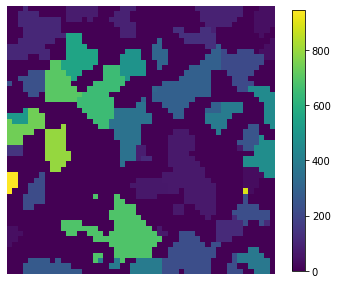

In [4]:
vols = ps.metrics.region_volumes(regions=regions, mode='voxel')
regions_vol = np.copy(regions)
for i in range(0, len(vols)):
    mask = np.array(np.where(regions_vol == i, regions_vol, 0), dtype=bool)
    regions_vol[mask] = vols[i]
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
plt.imshow(regions_vol[:,:,10], origin='lower', interpolation='none')
cbar = plt.colorbar(ax=ax, shrink=0.8)
ax.axis(False);